# WHH fitting

using Kim et al.(2025)'s equation on page6.

$T/T_c$ -vs- $H_{c2}(T)/H_{c2}^{orb}$

## hbar
Kim et al. 2025, $\hbar = (4/\pi^2)[H_{c2}/|dH_{c2}(T)/dT|_{T_c}]$  
instead of this, using   
$\hbar = (4/\pi^2)[H_{c2}/|dH_{c2}(T)/dt|_{t=1}] = (4/\pi^2)[H_{c2}/(T_c\cdot|dH_{c2}(T)/dT|_{T_c})]$  
where $t=T/T_c$ , following Werthamer et al 1966 (ref 2)

## Data
* digitized graph from ref [1], by MJ

## least_sqaure
* utillized scipy.optimize.least_sqaures to fit, plot.
* function in both form $f(\alpha, \lambda\_{so}, T_{c})=1/t-exp({\sum_{\nu}\{...\}})$, $(\alpha, \lambda\_{so}, T_{c})=\ln(1/t)-\sum_{\nu}\{...\}$ are given to minimize, reproduced..

## reference
[1]. Kim, S. et al. Spin-orbit coupling induced enhancement of upper critical field in superconducting A15 single crystals. Journal of Alloys and Compounds 1037, 182350 (2025).  
[2]. Werthamer, N. R., Helfand, E. & Hohenberg, P. C. Temperature and Purity Dependence of the Superconducting Critical Field, H c 2 . III. Electron Spin and Spin-Orbit Effects. Phys. Rev. 147, 295–302 (1966).



In [2]:
from scipy.optimize import least_squares, shgo
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import whh

In [3]:
fig5df = pd.read_csv("fig5_flatten.csv")
fig5df

,sample,T/Tc,H/H_orb,s1_slope,s1_maki,s1_H_orb,s1_T_c
0,TS1,0.92960,0.08267,1.29,0.68,5.22,5.4
1,TS1,0.83534,0.18046,1.29,0.68,5.22,5.4
2,TS1,0.74350,0.33166,1.29,0.68,5.22,5.4
3,TS1,0.65126,0.43411,1.29,0.68,5.22,5.4
4,TS1,0.55701,0.53510,1.29,0.68,5.22,5.4
5,TS1,0.46477,0.61800,1.29,0.68,5.22,5.4
6,TS1,0.37293,0.71578,1.29,0.68,5.22,5.4
7,TS1,0.25169,0.77445,1.29,0.68,5.22,5.4
8,TS1,0.17314,0.80860,1.29,0.68,5.22,5.4
9,TS1,0.13931,0.81503,1.29,0.68,5.22,5.4


# preview digitized data

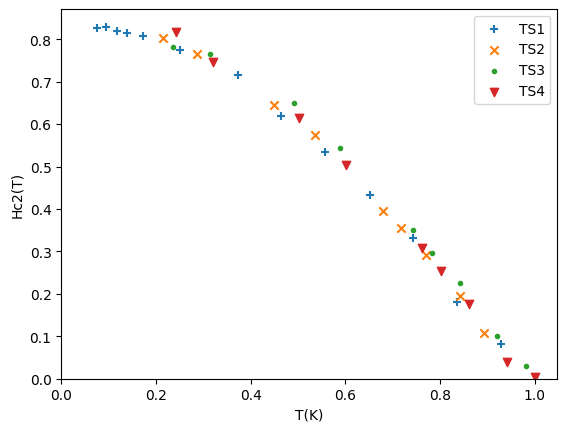

In [4]:
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Fit $\alpha$, $\lambda_{so}$ from Fig. 5 data
comments about $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$  
* slope $|dH_{c2}/dt|_{t=1}=1.4$  
* H_orb $H_{orb}=5.1$ **(note that it does nothing if we use same values on normalization and calculation)**
* T_c is not clearly given on the paper.  
    * $t_c=5.28$, from $H^{orb}_{c2}(0)=-0.69|dH_{c2}/dT|_{T_c}=-0.69T_c|dH_{c2}/dt|_{t=1}$  
    * average of 4 samples $T_c$ is 5.25  

## Slope=1.4, H_orb=5.1, T_c=5.28

In [7]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
#slope=fig5df['s1_slope'].to_numpy()
slope=np.array([1.4]*len(t))

#field_orb=fig5df['s1_H_orb'].to_numpy()
field_orb=np.array([5.1]*len(t))

#t_c=fig5df['s1_T_c'].to_numpy()
t_c=np.array([5.28]*len(t))


ms=(t, t_c, slope, field_norm, field_orb)
#%%
xs0=[0.6, 0.1]
res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=1)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x (Maki param., lambda_so):{res_lsq.x}")

`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.3244e-02, final cost 4.9961e-03, first-order optimality 5.30e-08.
res_lsq.x (Maki param., lambda_so):[6.50608298e-01 1.20041841e-15]


## Plot Curves

In [41]:
#%% plot from equation; y0=[0.6]
x=t.copy()
x.sort()
len_x=len(x)

field_orb=5.1
t_c=5.28
slope=1.4
alpha=0.0
l_so=0.0

y0=[0.6] # initial guess

plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]

alpha=0.7
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha_7lso0 = [least_squares(whh.residual_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]


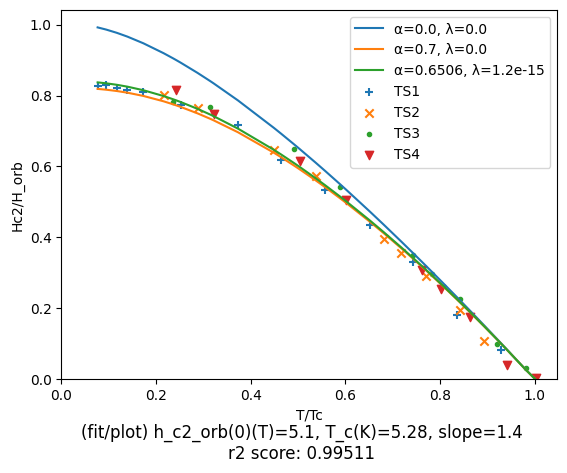

r2 score (α=0.7, λ=0.0)-vs-measured: 0.99364


In [42]:

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, alpha_7lso0, label="α=0.7, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:0.4}, λ={res_lsq.x[1]:0.4}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()

fig5df_sorted = fig5df.sort_values(by=["T/Tc"])

plt.figtext(0.5, -0.05, f"(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.28, slope=1.4\nr2 score: {r2_score(fit_params, fig5df_sorted["H/H_orb"].to_numpy()):0.5}", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

print(f"r2 score (α=0.7, λ=0.0)-vs-measured: {r2_score(alpha_7lso0, fig5df_sorted["H/H_orb"].to_numpy()):0.5}")

# Fit each samples, use supplement data

In [43]:
supple_df = pd.read_csv("fig5_digitized_supple.csv")
supple_df

,T_c,T(K),Hc2(T),Slope(T/K),slope_error,Hc2_orb,sample
0,5.4,0.37165,4.33058,1.29,0.17,5.22,TS1
1,5.4,0.47988,4.33058,1.29,0.17,5.22,TS1
2,5.4,0.58812,4.28378,1.29,0.17,5.22,TS1
3,5.4,0.72281,4.26038,1.29,0.17,5.22,TS1
4,5.4,0.92244,4.21358,1.29,0.17,5.22,TS1
5,5.4,1.33854,4.05813,1.29,0.17,5.22,TS1
6,5.4,1.99035,3.72717,1.29,0.17,5.22,TS1
7,5.4,2.49785,3.25914,1.29,0.17,5.22,TS1
8,5.4,2.99813,2.79446,1.29,0.17,5.22,TS1
9,5.4,3.48879,2.25623,1.29,0.17,5.22,TS1


## Fit $\alpha$, $\lambda_{so}$ and Slope

In [44]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]

for sample_df in sample_dfs:
    T=sample_df['T(K)'].to_numpy()
    field=sample_df['Hc2(T)'].to_numpy()
    sample_name = sample_df['sample'].to_list()
    slope=sample_df['Slope(T/K)'].to_numpy()
    slope_error=sample_df['slope_error'].to_numpy()

    field_orb=sample_df['Hc2_orb'].to_numpy()
    t_c=sample_df['T_c'].to_numpy()
    t = T/t_c
    field_norm=field/field_orb

    ms=(t, t_c, field)
    #ms=(t, t_c, slope, field)
    #%%
    xs0=[0.6, 1e-8, 1.0]
    res_lsq=least_squares(whh.residual_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0, -np.inf), (5.0, 5.0, np.inf)), verbose=1)
    #res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
    print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}, slope: {res_lsq.x[2]}")

`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 3.3849e-01, final cost 8.0837e-04, first-order optimality 5.62e-09.
sample: TS1. maki_param: 0.5544538599333059, lambda_so: 2.2533176800531997e-16, slope: 1.336486121613087
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.6155e-01, final cost 2.8176e-04, first-order optimality 1.32e-09.
sample: TS2. maki_param: 0.6094313012207369, lambda_so: 3.673509100347996e-21, slope: 1.4133027283289559
`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 1.4816e-01, final cost 3.4506e-04, first-order optimality 4.74e-10.
sample: TS3. maki_param: 0.8470728103134844, lambda_so: 2.4233807008389483e-26, slope: 1.5267454206723323
`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 1.3081e-01, final cost 5.8362e-04, first-order optimality 6.98e-10.
sample: TS4. maki_param: 0.3703785150343994, lambda_so: 1.2591950062660915e-16, slope: 1.3

## Fit $\alpha$, $\lambda_{so}$ and Slope(bounded)
Slope is bounded to error ranges on Table S1 

In [45]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]

for sample_df in sample_dfs:
    T=sample_df['T(K)'].to_numpy()
    field=sample_df['Hc2(T)'].to_numpy()
    sample_name = sample_df['sample'].to_list()
    slope=sample_df['Slope(T/K)'].to_numpy()
    slope_error=sample_df['slope_error'].to_numpy()

    field_orb=sample_df['Hc2_orb'].to_numpy()
    t_c=sample_df['T_c'].to_numpy()
    t = T/t_c
    field_norm=field/field_orb

    ms=(t, t_c, field)
    #ms=(t, t_c, slope, field)
    #%%
    xs0=[0.6, 1e-8, slope[0]]
    res_lsq=least_squares(whh.residual_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0, slope[0]-slope_error[0]), (5.0, 5.0, slope[0]+slope_error[0])), verbose=1)
    #res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
    print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}, slope: {res_lsq.x[2]}")

`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 1.0035e-02, final cost 8.0837e-04, first-order optimality 1.00e-08.
sample: TS1. maki_param: 0.5544536775395692, lambda_so: 5.349920758099671e-14, slope: 1.336486031437875
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 11, initial cost 2.5469e-03, final cost 2.9036e-04, first-order optimality 2.44e-09.
sample: TS2. maki_param: 0.5783031706531142, lambda_so: 3.087931109648525e-28, slope: 1.4
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 4.0548e-03, final cost 8.9422e-04, first-order optimality 1.50e-09.
sample: TS3. maki_param: 0.582206511904123, lambda_so: 3.086401989393286e-20, slope: 1.4
`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 1.0958e-02, final cost 5.8362e-04, first-order optimality 1.49e-09.
sample: TS4. maki_param: 0.3703794894126241, lambda_so: 2.621357403674441e-12, slope: 1.3264466277653724

### TS4 with slope=1.4, $\lambda_{so}=0.0$

In [49]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
sample_df=sample_dfs[3]
T=sample_df['T(K)'].to_numpy()
field=sample_df['Hc2(T)'].to_numpy()
sample_name = sample_df['sample'].to_list()
slope=np.array([1.4]*len(T))
slope_error=sample_df['slope_error'].to_numpy()

field_orb=sample_df['Hc2_orb'].to_numpy()
t_c=sample_df['T_c'].to_numpy()
t = T/t_c
field_norm=field/field_orb

ms=(t, t_c, slope, field_norm, field_orb)
#ms=(t, t_c, slope, field)
#%%
xs0=[0.6, 1e-8]
#res_lsq=least_squares(whh.residual_exp_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0), (5.0, 5.0)), verbose=1)
res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 1e-7)), gtol=None, ftol=1e-12, verbose=1)
print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}")

`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 8.3016e-04, final cost 7.9933e-04, first-order optimality 3.08e-09.
sample: TS4. maki_param: 0.5805612349392459, lambda_so: 9.999999999999998e-08


# Fit using Slope, H_orb, T_c on Table S1
Fit $\alpha$, $\lambda_{so}$ with $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$ on Table S1

In [52]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
slope=fig5df['s1_slope'].to_numpy()

field_orb=fig5df['s1_H_orb'].to_numpy()

t_c=fig5df['s1_T_c'].to_numpy()


ms=(t, t_c, slope, field_norm, field_orb)

xs0=[0.6, 0.1]
_res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=1)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x (Maki param., lambda_so):{_res_lsq.x}")

`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 1.7529e-02, final cost 8.4642e-03, first-order optimality 9.97e-08.
res_lsq.x (Maki param., lambda_so):[4.27658646e-01 1.33911165e-17]


# Supplement data

In [10]:
supple_df = pd.read_csv("fig5_digitized_supple.csv")
supple_df

,T_c,T(K),Hc2(T),Slope(T/K),slope_error,Hc2_orb,sample
0,5.4,0.37165,4.33058,1.29,0.17,5.22,TS1
1,5.4,0.47988,4.33058,1.29,0.17,5.22,TS1
2,5.4,0.58812,4.28378,1.29,0.17,5.22,TS1
3,5.4,0.72281,4.26038,1.29,0.17,5.22,TS1
4,5.4,0.92244,4.21358,1.29,0.17,5.22,TS1
5,5.4,1.33854,4.05813,1.29,0.17,5.22,TS1
6,5.4,1.99035,3.72717,1.29,0.17,5.22,TS1
7,5.4,2.49785,3.25914,1.29,0.17,5.22,TS1
8,5.4,2.99813,2.79446,1.29,0.17,5.22,TS1
9,5.4,3.48879,2.25623,1.29,0.17,5.22,TS1


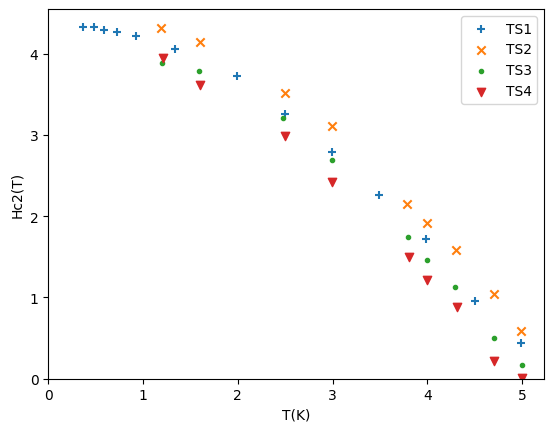

In [11]:
# Preview digitized
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T(K)"].to_numpy(), sample_df["Hc2(T)"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

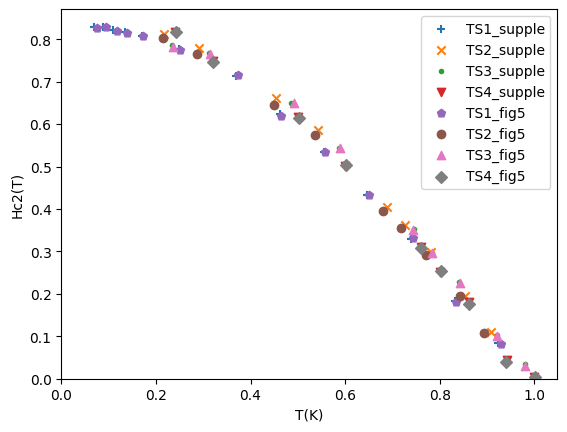

In [12]:
# preview normalized on S1

from matplotlib.lines import Line2D

# Preview digitized
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T(K)"].to_numpy()/sample_df["T_c"].to_numpy(), sample_df["Hc2(T)"].to_numpy()/sample_df["Hc2_orb"].to_numpy(), label=sample+"_supple", marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

##marker formatting
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['p','o','^','D']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample+"_fig5", marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]
ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [13]:
t_c_s1=supple_df['T_c'].to_numpy()
T=supple_df['T(K)'].to_numpy()
h_c2=supple_df['Hc2(T)'].to_numpy()
slope=supple_df['Slope(T/K)'].to_numpy()
h_orb=supple_df['Hc2_orb'].to_numpy()

# normalize measured data
t=T/t_c_s1
h_norm=h_c2/h_orb

In [14]:
# without settled params
#h_orb=np.array([5.1]*len(t))
#t_c=np.array([5.28]*len(t))
#slope=np.array([1.4]*len(t))


ms=(t, t_c_s1, slope, h_norm, h_orb)
#%%
xs0=[0.6, 0.1]
#res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-8, verbose=1)
print(f"res_lsq.x (Maki param., lambda_so):{res_lsq.x}")

`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.7425e-02, final cost 6.9390e-03, first-order optimality 1.31e-08.
res_lsq.x (Maki param., lambda_so):[4.18670166e-01 1.83326321e-13]


In [15]:
# with settled params
h_orb=np.array([5.1]*len(t))
t_c=np.array([5.28]*len(t))
slope=np.array([1.4]*len(t))


ms=(t, t_c, slope, h_norm, h_orb)
#%%
xs0=[0.6, 0.1]
#res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-8, verbose=1)
print(f"res_lsq.x (Maki param., lambda_so):{res_lsq.x}")

`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 1.1979e-02, final cost 4.7318e-03, first-order optimality 1.45e-08.
res_lsq.x (Maki param., lambda_so):[6.42233783e-01 1.13252658e-24]
